### Задача

Вам предстоит решить типичную для продуктовой аналитики задачу прогноза LTV пользователя. Для этого необходимо:
1) провести исследовательский анализ данных,
2) визуализировать результаты и сделать из них выводы,
3) провести предобработку признаков (возможно создать новые),
4) обучить модели, и подобрать для каждой из них оптимальные гиперпараметры,
5) оценить работу моделей и сравнить их между собой, выбрать итоговую и объяснить свой выбор,
6) проинтерпретировать получившиеся результаты (что и как влияет на LTV пользователя).

### Данные
В файле LTV.csv представлены данные о пользователях с автомобильной страховкой, собранных системой аналитики компании IBM. https://www.ibm.com/communities/analytics/watson-analytics-blog/marketing-customer-value-analysis/


Описание данных:

* Customer - идентификатор пользователя
* State - штат
* Customer Lifetime Value - LTV пользователя
* Response - взаимодействие с рекламой
* Coverage - тип страхового покрытия
* Education - образование
* Effective to date - срок действия страховки
* EmploymentStatus - трудоустройство
* Gender - пол
* Income - доход
* Location code - тип местности в которой проживает пользователь
* Marital Status - семейное положение
* Monthly Premium Auto
* Months Since Last Claim - месяцев с последнего требования по выплате компенсации
* Months Since Policy Inception - месяцев с открытия страховки
* Number of Open Complaints - количество незакрытых жалоб
* Number of Policies - количество полисов
* Policy Type - тип страховки
* Policy - страховка
* Renew Offer Type - обновленный тип предложения
* Sales Channel - канал продаж
* Total Claim Amount - сумма выплаченных компенсаций
* Vehicle Class - класс автомобиля
* Vehicle Size - размер автомобиля

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

Загрузим датасет и посмотри несколько случайных значений из него

In [117]:
train_data = pd.read_csv('./LTV.csv')

print(f'Размер датасета: {train_data.shape}')

train_data.sample(10)

Размер датасета: (9134, 24)


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
508,SV38190,Nevada,6481.526576,No,Extended,Bachelor,1/13/11,Employed,F,30689,...,51,0,5,Personal Auto,Personal L2,Offer4,Branch,467.248020,Four-Door Car,Medsize
2056,EX61844,Arizona,14019.975460,No,Basic,High School or Below,2/27/11,Employed,M,36733,...,28,0,2,Personal Auto,Personal L2,Offer2,Agent,327.078047,Four-Door Car,Medsize
2445,ZW19492,Oregon,2404.917967,No,Basic,Bachelor,2/14/11,Employed,M,63455,...,71,0,1,Personal Auto,Personal L3,Offer1,Branch,287.654819,Two-Door Car,Medsize
2182,MO33279,California,5592.455266,No,Basic,College,1/12/11,Employed,F,62229,...,26,0,5,Personal Auto,Personal L2,Offer3,Agent,336.000000,Two-Door Car,Medsize
4515,LX23185,Oregon,2643.715740,No,Extended,College,2/4/11,Unemployed,F,0,...,56,3,1,Personal Auto,Personal L3,Offer1,Branch,393.600000,Two-Door Car,Medsize
4313,KC36987,Oregon,13334.267630,No,Premium,Bachelor,1/20/11,Employed,M,47950,...,86,1,8,Personal Auto,Personal L3,Offer1,Branch,780.990942,SUV,Medsize
8491,SM67119,California,7123.694599,No,Basic,College,2/24/11,Disabled,F,16139,...,69,0,2,Personal Auto,Personal L3,Offer1,Branch,297.600000,Four-Door Car,Large
6874,LI76661,Oregon,7443.832860,No,Extended,Bachelor,1/7/11,Employed,M,89285,...,11,0,4,Corporate Auto,Corporate L3,Offer4,Call Center,243.547316,Two-Door Car,Medsize
426,UX38930,Arizona,10364.347490,No,Extended,Master,1/9/11,Employed,F,58327,...,5,0,3,Personal Auto,Personal L3,Offer2,Branch,347.075948,SUV,Medsize
2940,AT55072,Arizona,9103.899700,No,Premium,College,2/4/11,Employed,M,65733,...,6,0,3,Personal Auto,Personal L2,Offer2,Agent,684.948527,Four-Door Car,Medsize


Посмотрим информацию о датасете

In [118]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

Проверим датасет на дубликаты

In [119]:
duplicates = train_data.duplicated()
train_data[duplicates]

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size


Вывод: В датасете представлены 24 столбца с разными типами значений (строковые  и числовые), пустые значение в столбцах отсутствуют, дубликаты отсутствуют

### Визуализация данных

Выделим матрицу признаков и вектор с целевой переменной в тренировочной выборке

In [120]:
# Тренировочная выборка
X = train_data.drop('Customer Lifetime Value', axis = 1)

# Целевая переменная
y = pd.DataFrame(train_data['Customer Lifetime Value'])

Выделяем численные признаки от остальных

In [121]:
num_cols = []
str_cols = []

cols_and_type = X.dtypes.to_dict()

for col in cols_and_type:
    if cols_and_type[col] in ('int64', 'float64'):
        num_cols.append(col)
    else: 
        str_cols.append(col)
        
print(num_cols)

['Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']


In [122]:
cols_and_type

{'Customer': dtype('O'),
 'State': dtype('O'),
 'Response': dtype('O'),
 'Coverage': dtype('O'),
 'Education': dtype('O'),
 'Effective To Date': dtype('O'),
 'EmploymentStatus': dtype('O'),
 'Gender': dtype('O'),
 'Income': dtype('int64'),
 'Location Code': dtype('O'),
 'Marital Status': dtype('O'),
 'Monthly Premium Auto': dtype('int64'),
 'Months Since Last Claim': dtype('int64'),
 'Months Since Policy Inception': dtype('int64'),
 'Number of Open Complaints': dtype('int64'),
 'Number of Policies': dtype('int64'),
 'Policy Type': dtype('O'),
 'Policy': dtype('O'),
 'Renew Offer Type': dtype('O'),
 'Sales Channel': dtype('O'),
 'Total Claim Amount': dtype('float64'),
 'Vehicle Class': dtype('O'),
 'Vehicle Size': dtype('O')}

На основе текста задания построим словарь названий признаков, чтобы легче было понять график признаков

In [123]:
dict_col = {
'Customer': 'идентификатор пользователя',
'State': 'штат',
'Customer Lifetime Value': 'LTV пользователя',
'Response': 'взаимодействие с рекламой',
'Coverage': 'тип страхового покрытия',
'Education': 'образование',
'Effective To Date': 'срок действия страховки',
'EmploymentStatus': 'трудоустройство',
'Gender': 'пол',
'Income': 'доход',
'Location Code': 'тип местности в которой проживает пользователь',
'Marital Status': 'семейное положение',
'Monthly Premium Auto': 'Ежемесячный Премиум Авто',
'Months Since Last Claim': 'месяцев с последнего требования по выплате компенсации',
'Months Since Policy Inception': 'месяцев с открытия страховки',
'Number of Open Complaints': 'количество незакрытых жалоб',
'Number of Policies': 'количество полисов',
'Policy Type': 'тип страховки',
'Policy': 'страховка',
'Renew Offer Type': 'обновленный тип предложения',
'Sales Channel': 'канал продаж',
'Total Claim Amount': 'сумма выплаченных компенсаций',
'Vehicle Class': 'класс автомобиля',
'Vehicle Size': 'размер автомобиля'
}

Построим графики и посмотрим на распределение признаков

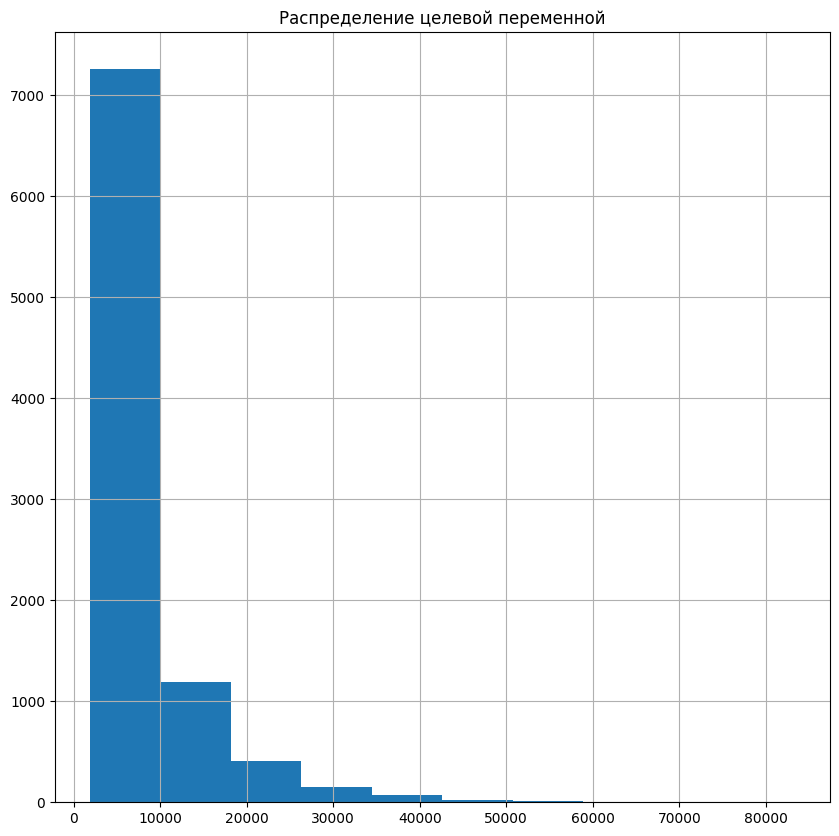

In [124]:
plt.figure(figsize = (10, 10))
plt.title('Распределение целевой переменной')
train_data['Customer Lifetime Value'].hist()

plt.show()

Распределение числовых признаков

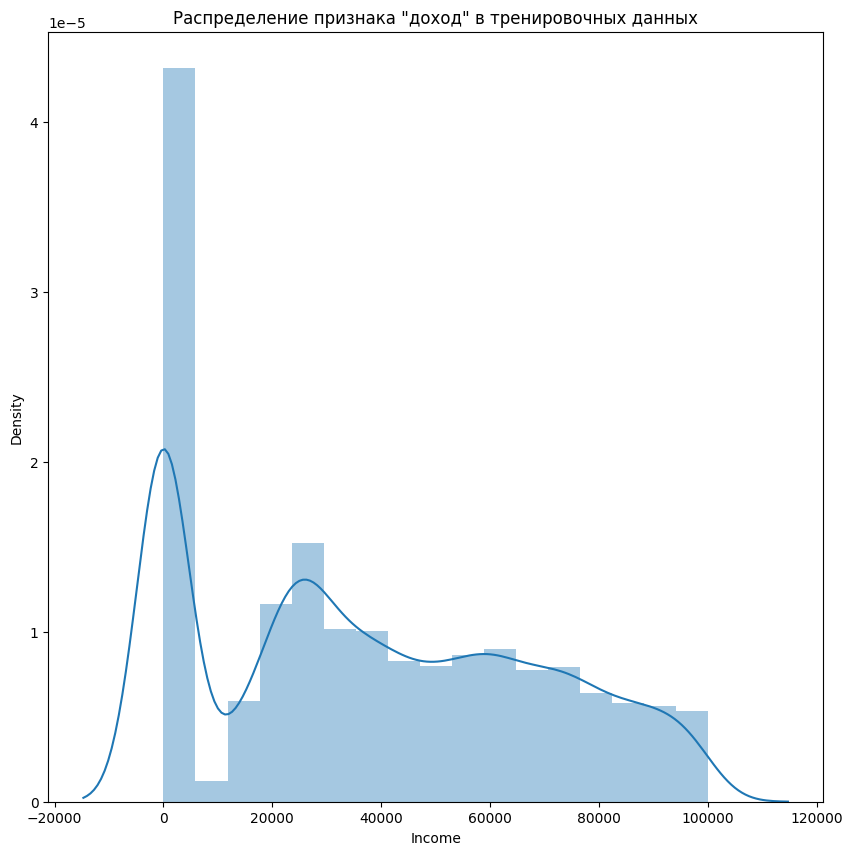

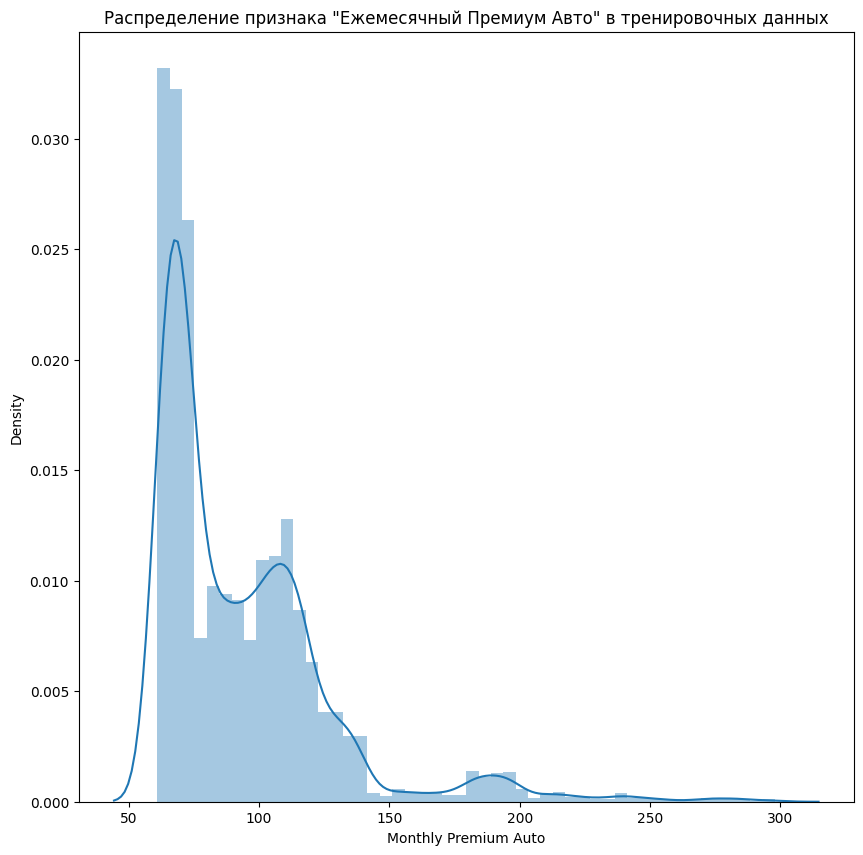

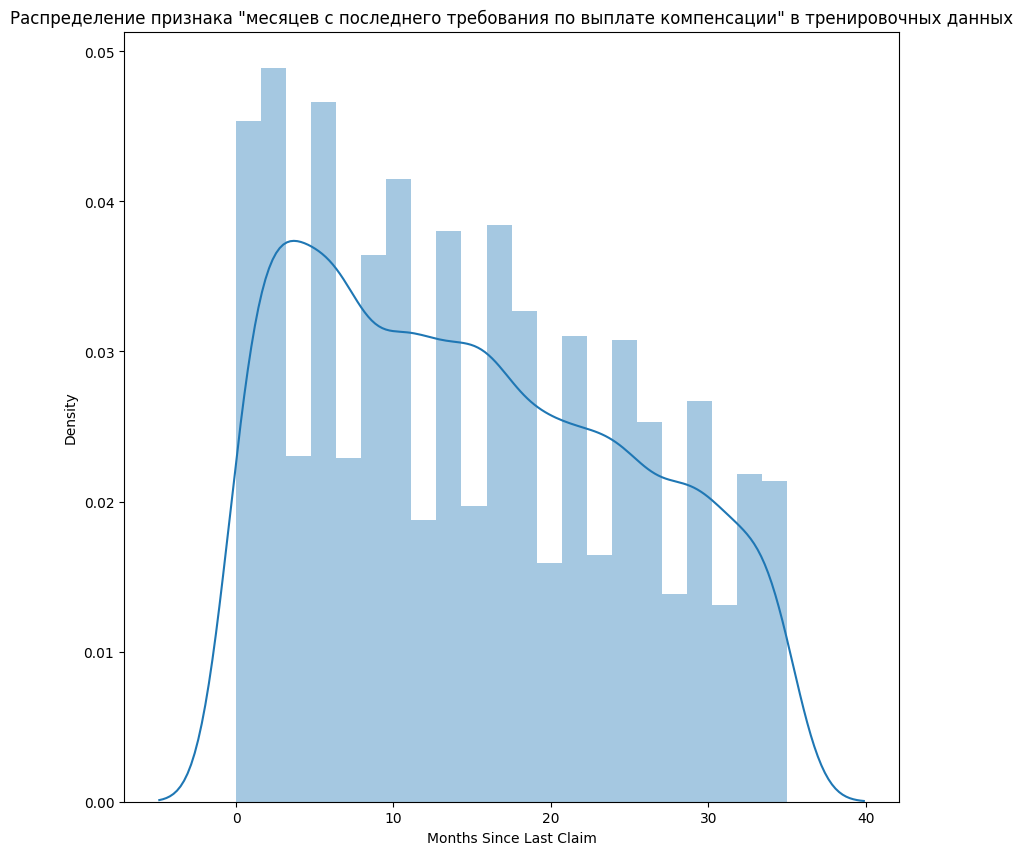

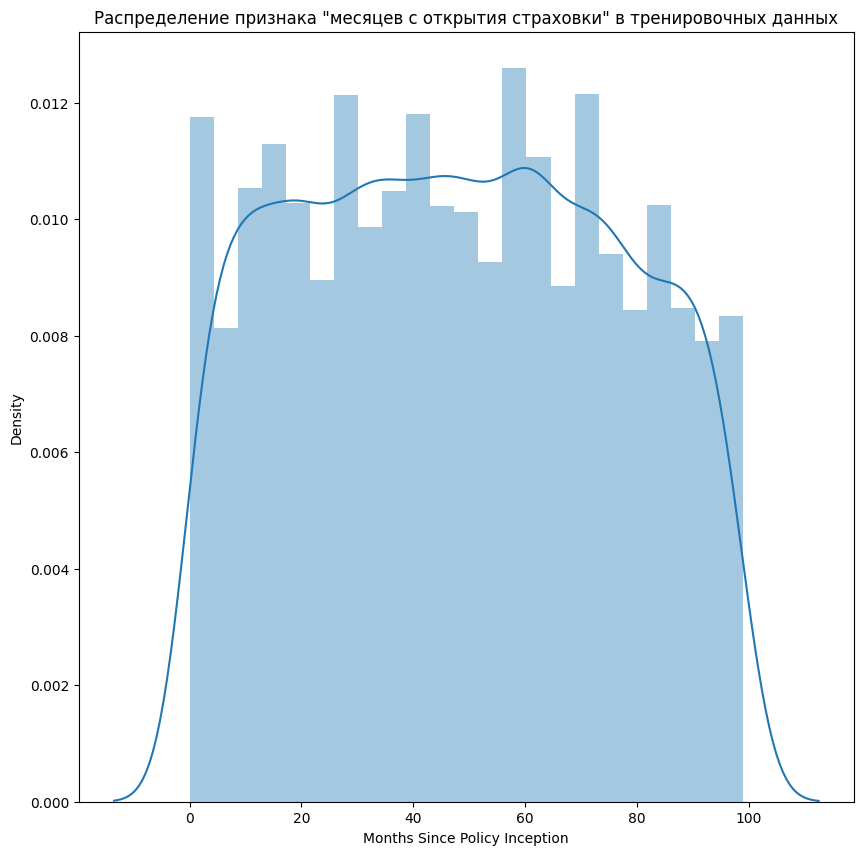

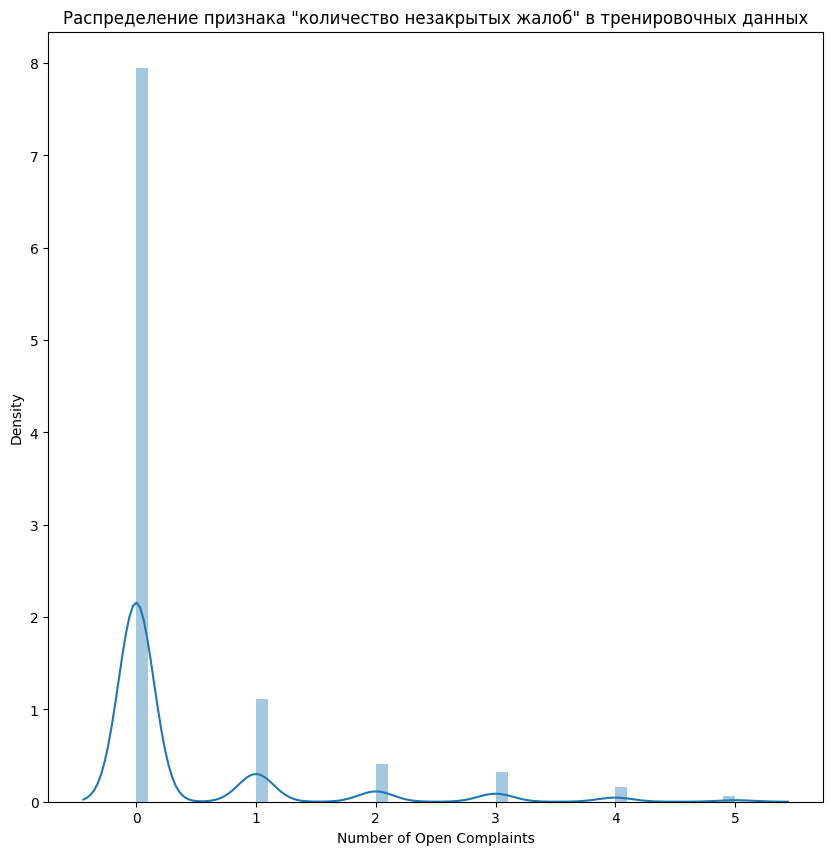

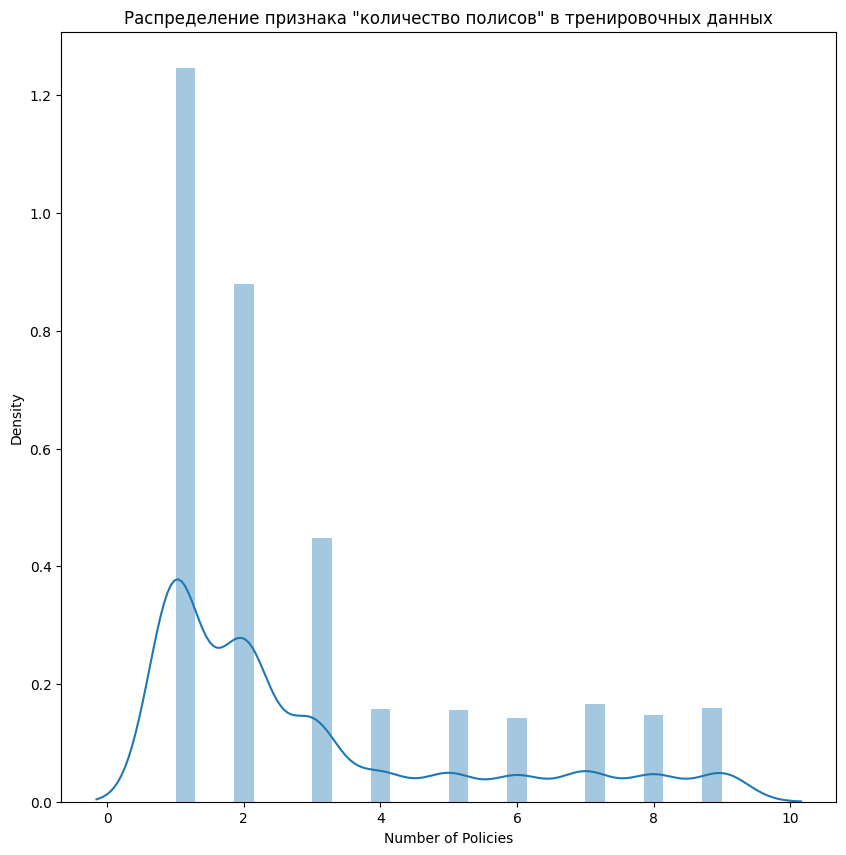

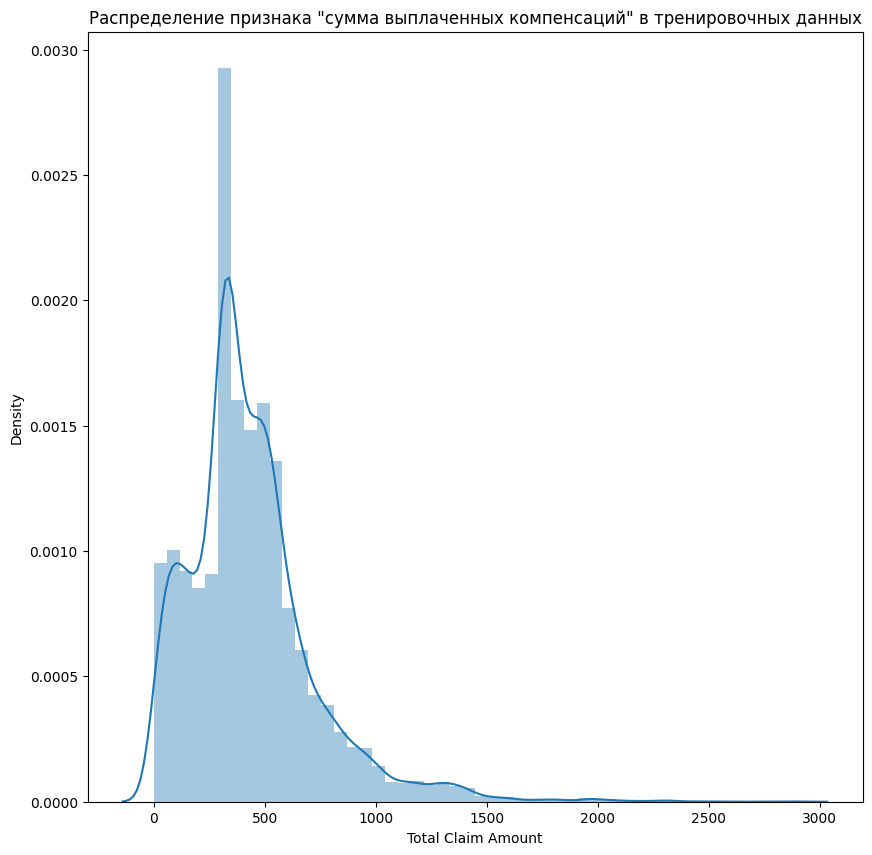

In [125]:
for col in num_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака "{dict_col[col]}" в тренировочных данных')
    sns.distplot(train_data[col])

Вывод: Числовые признаки распределены нормально

Распределение строковых признаков

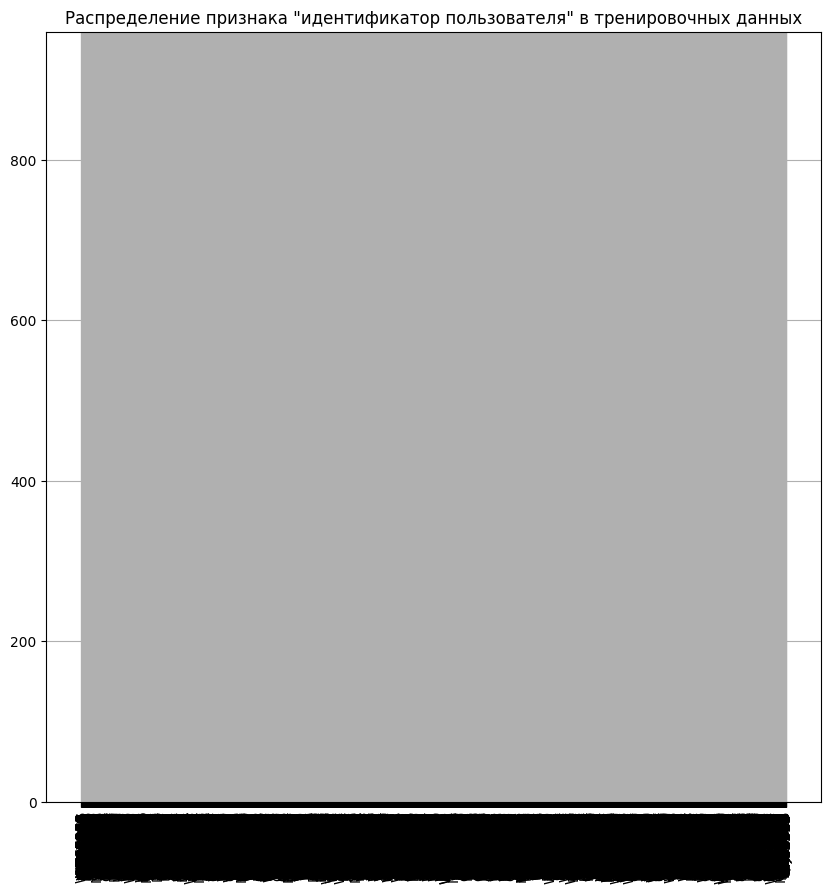

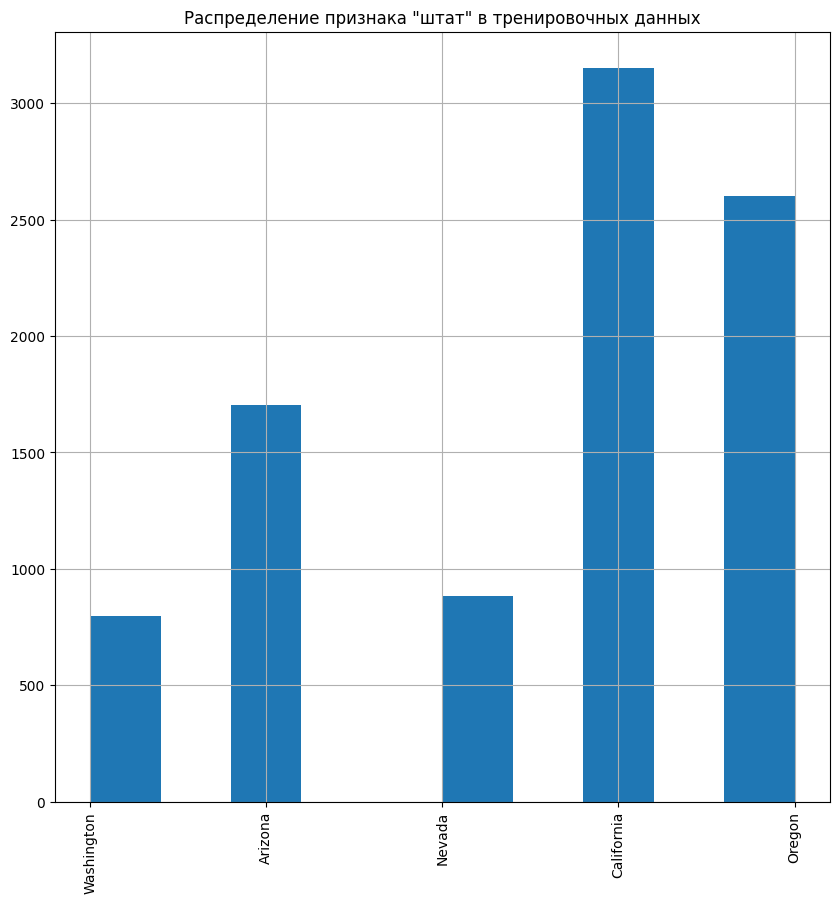

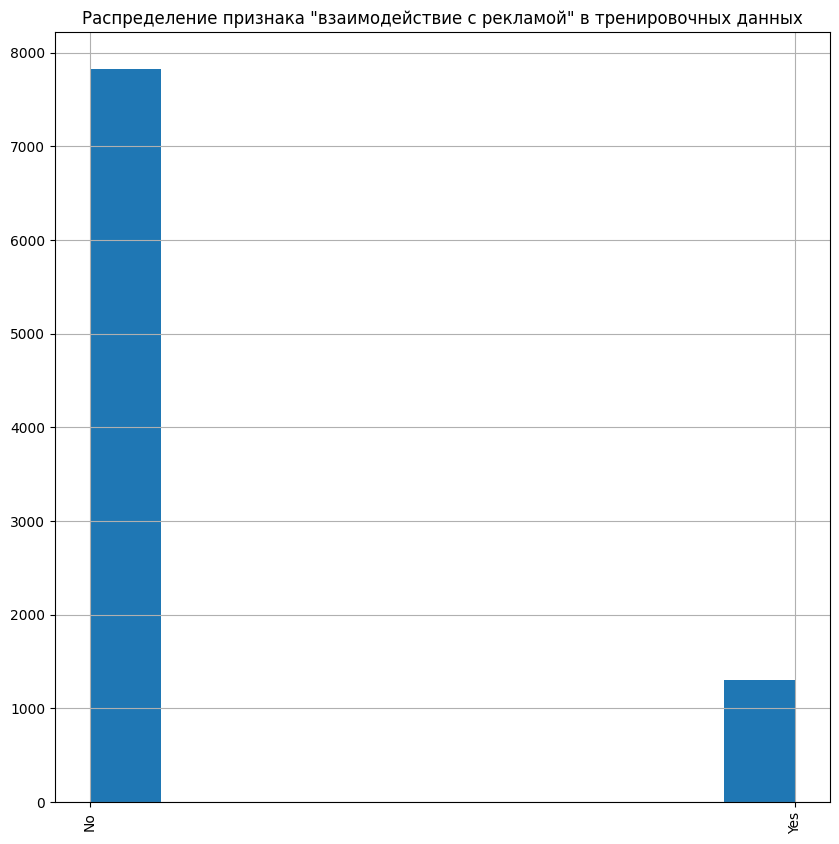

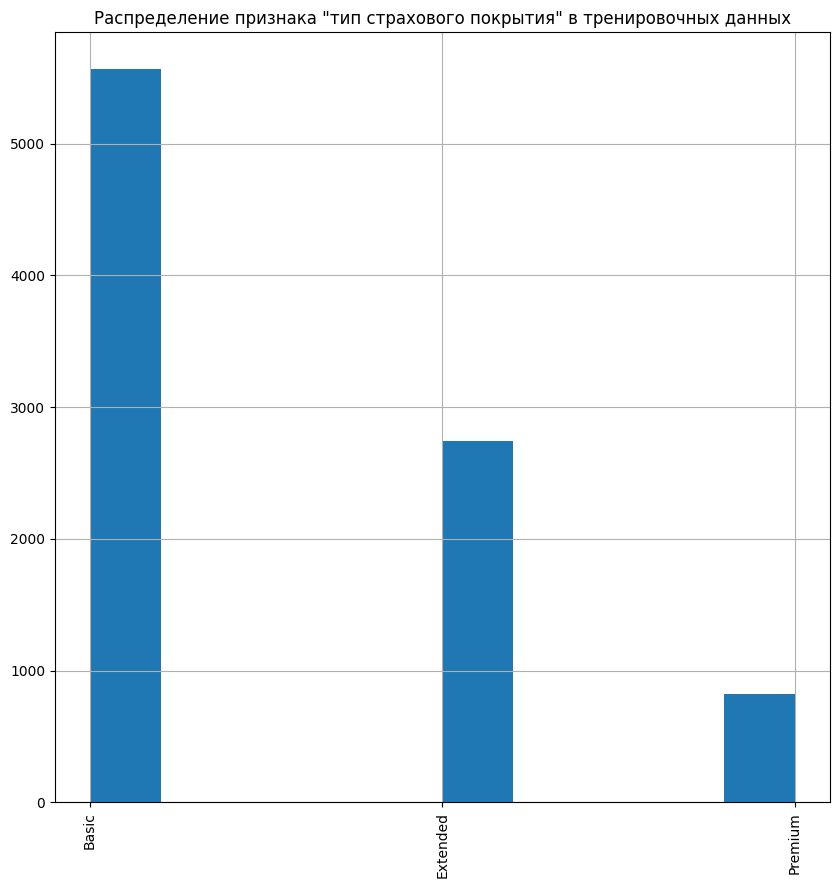

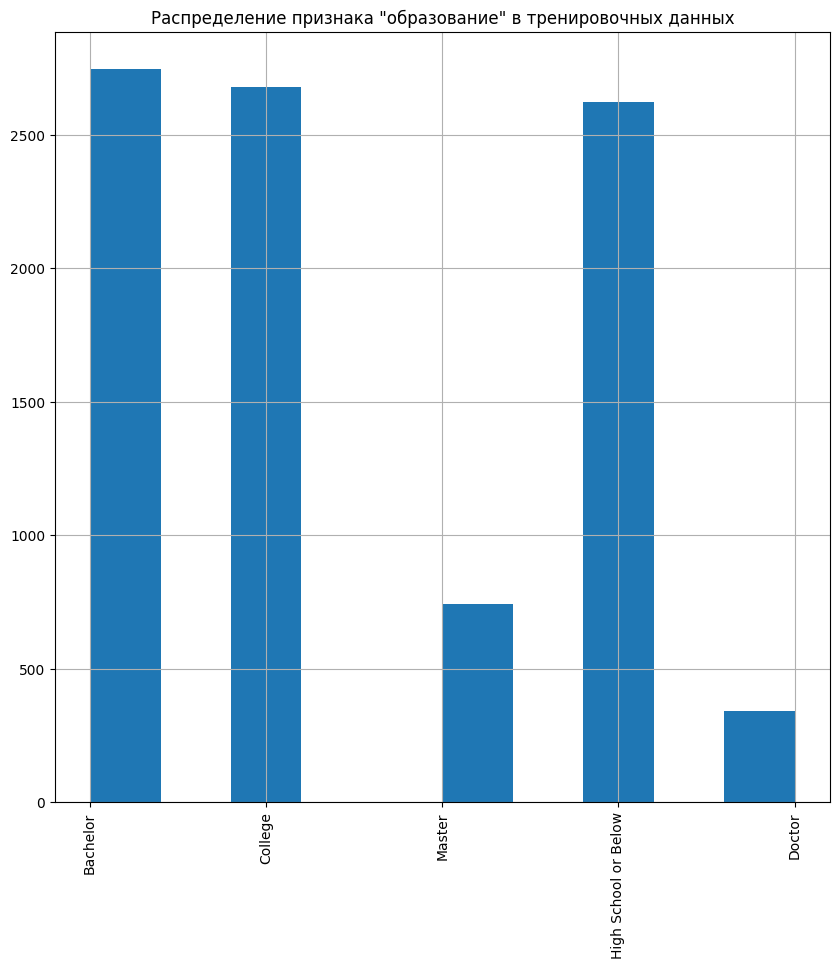

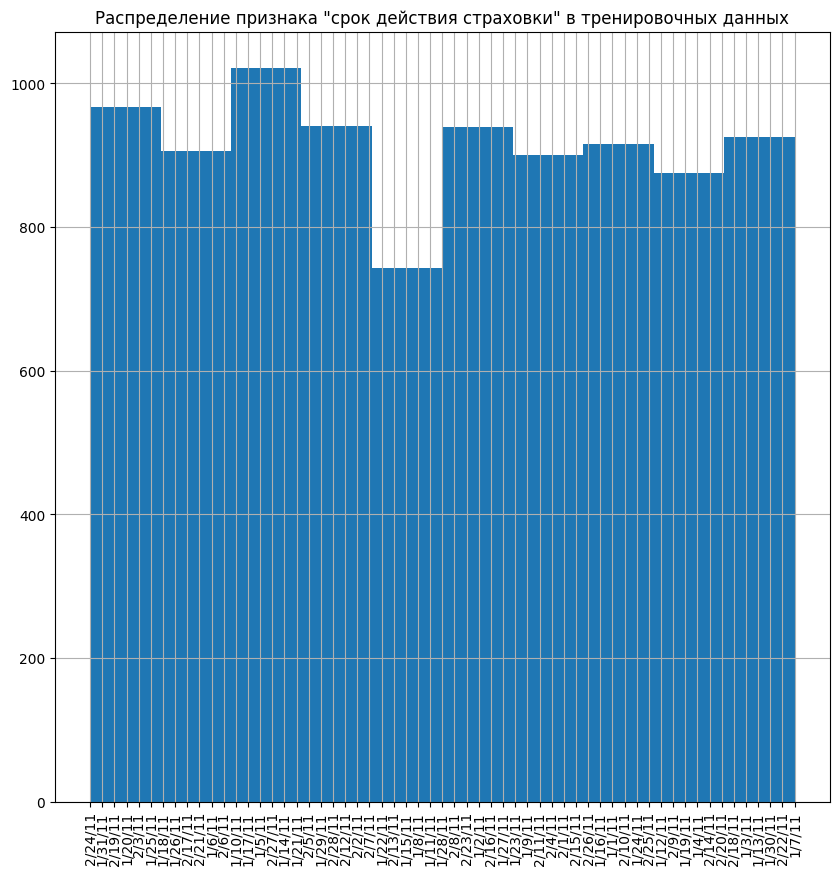

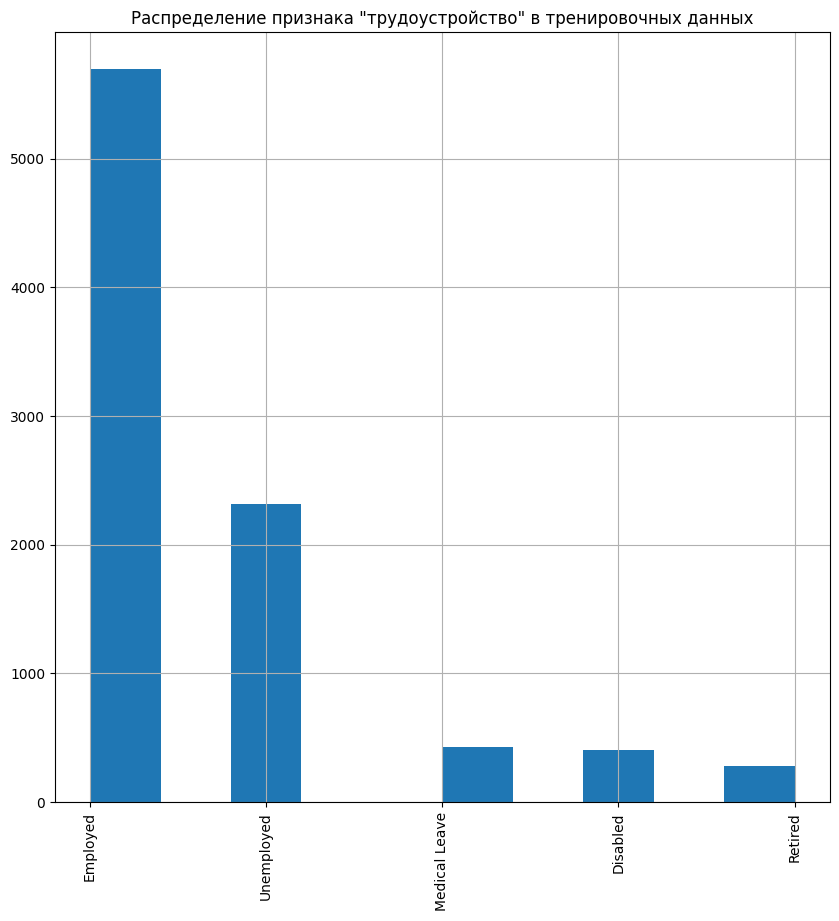

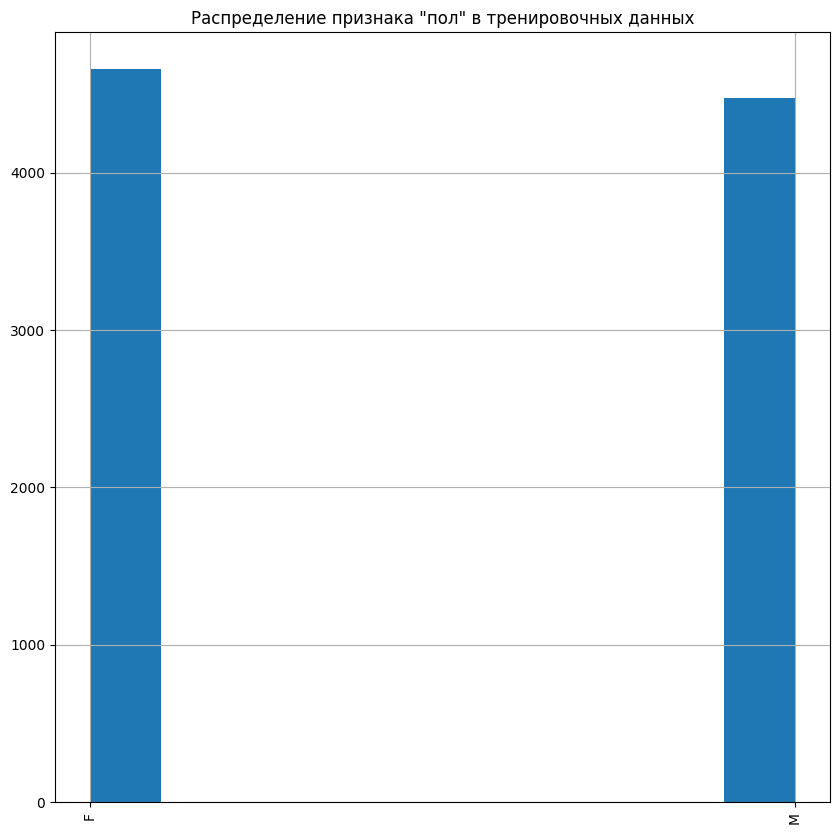

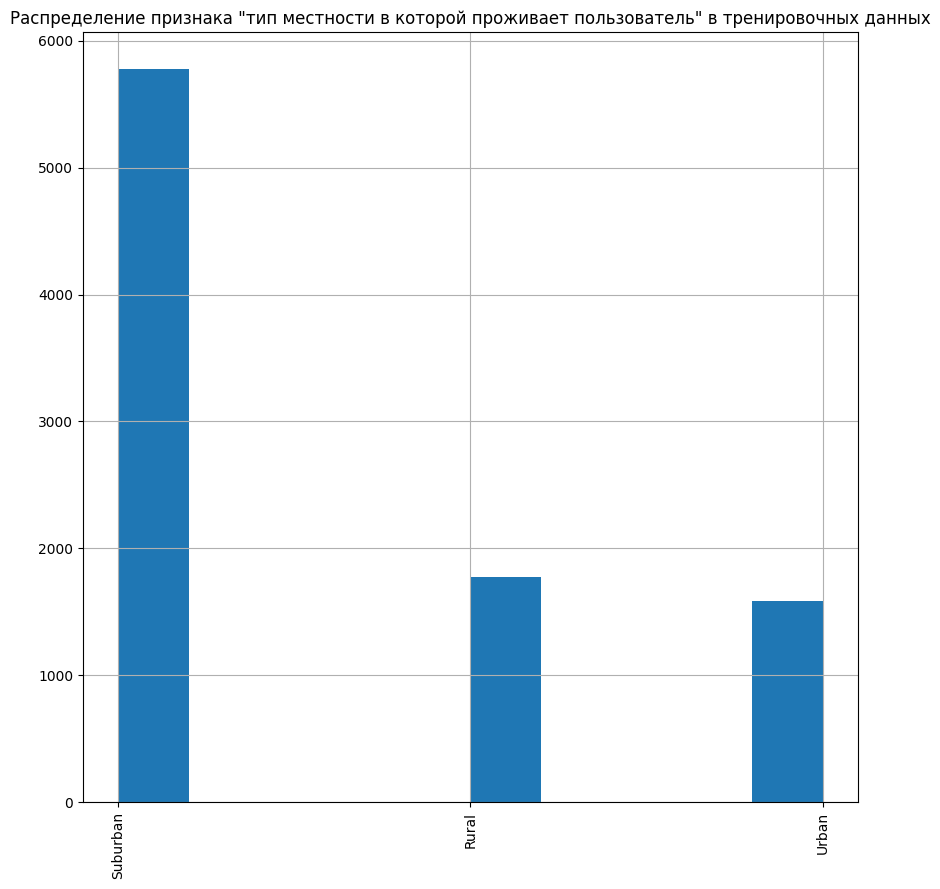

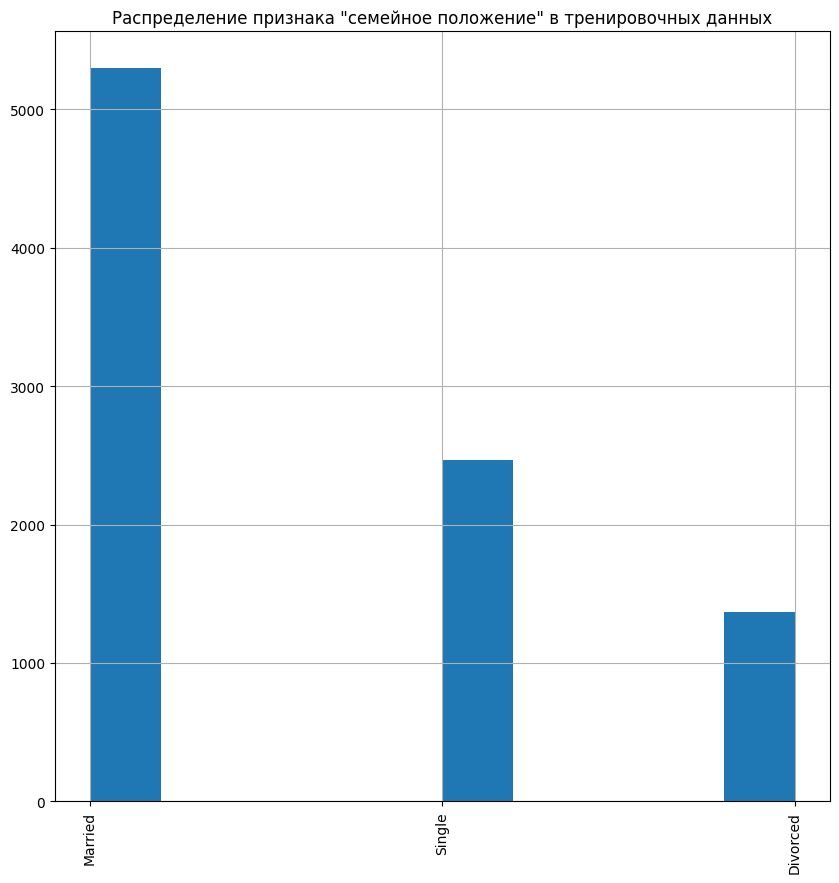

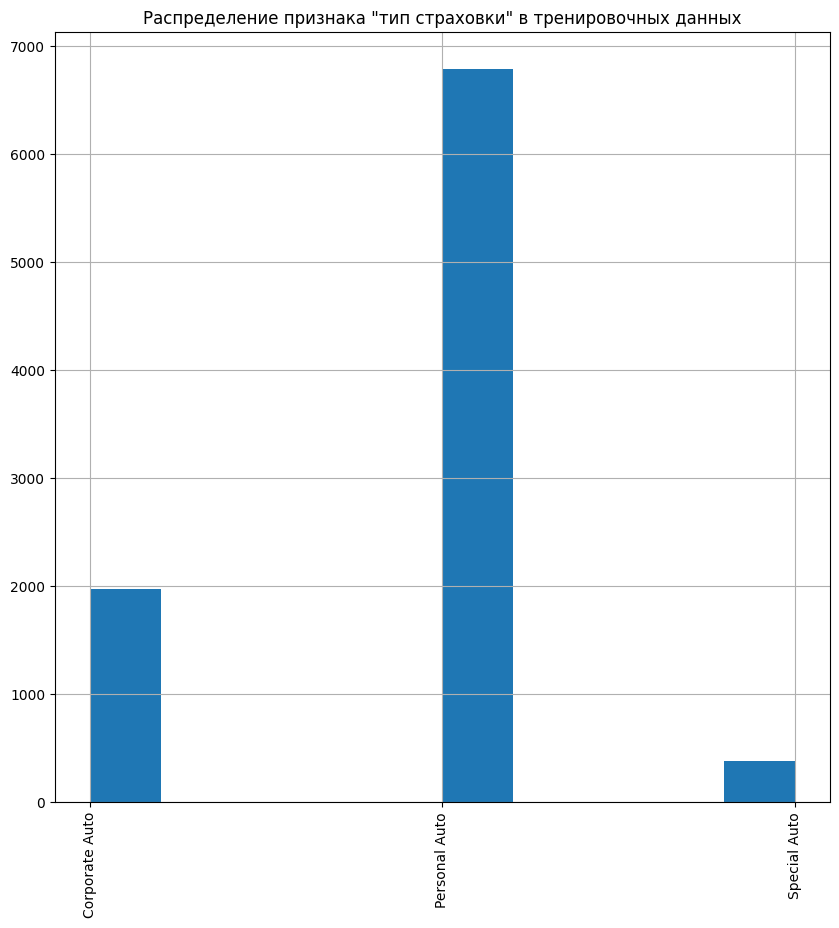

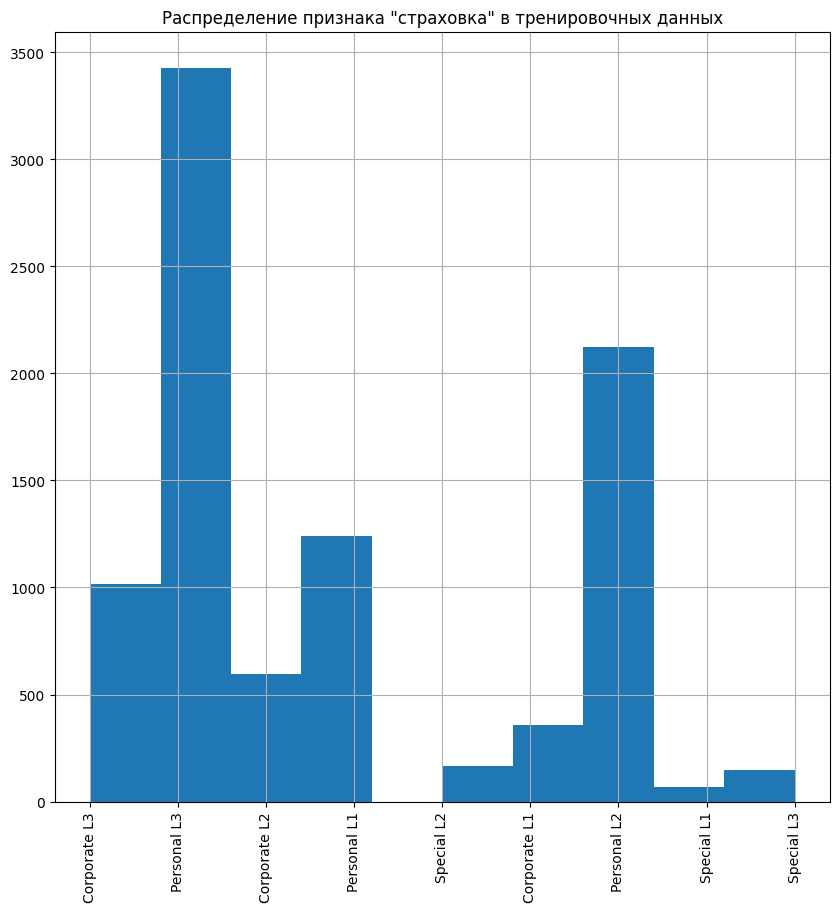

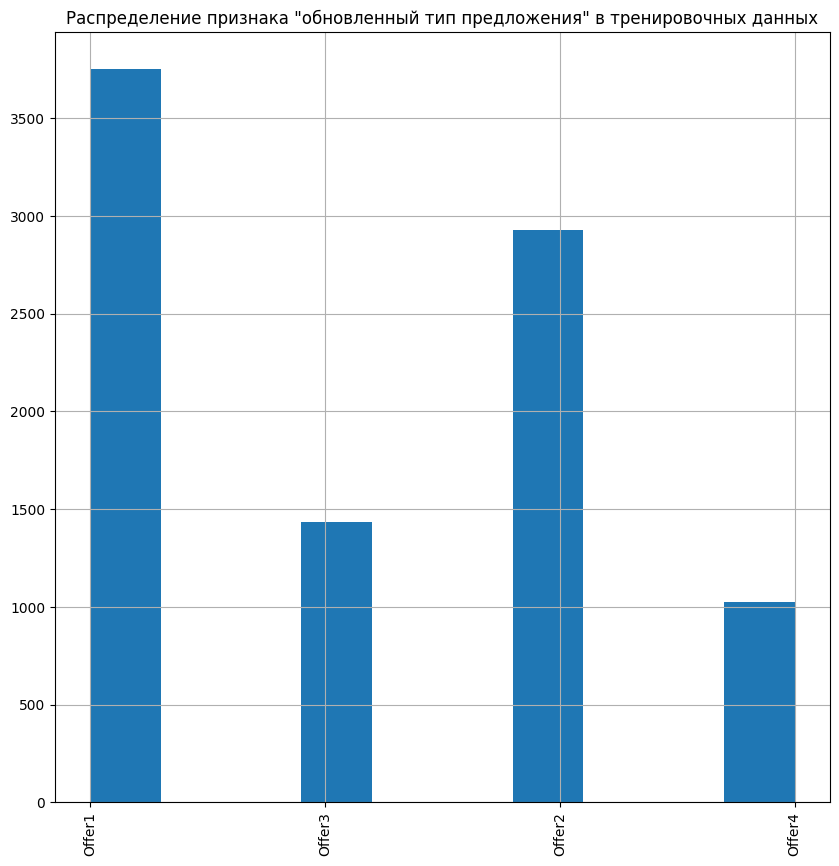

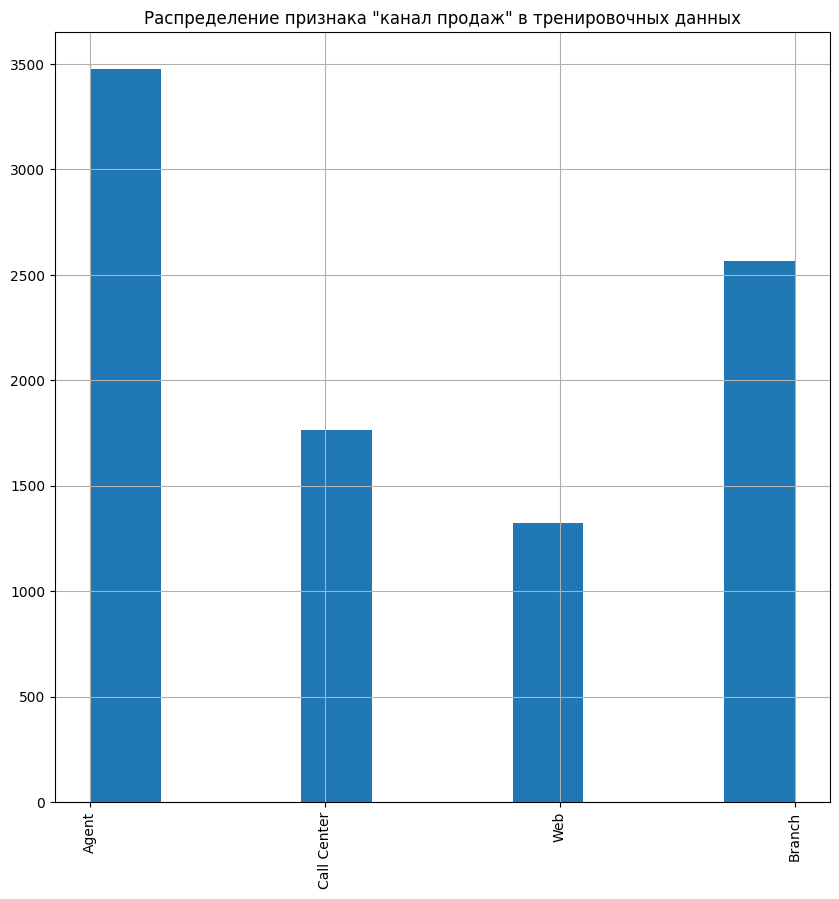

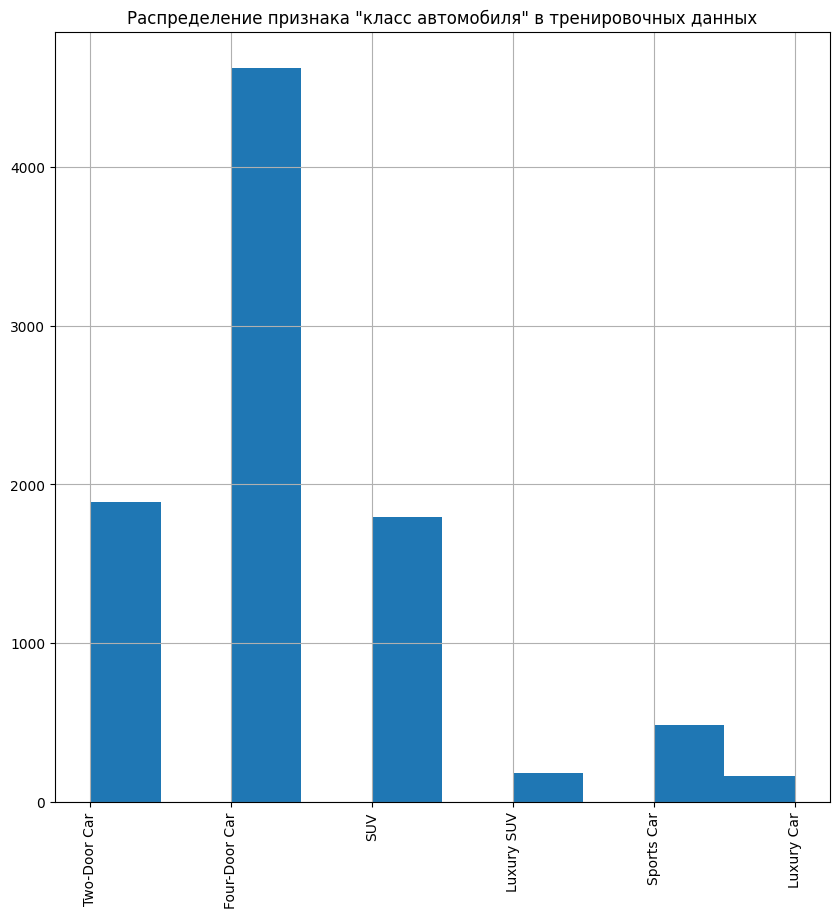

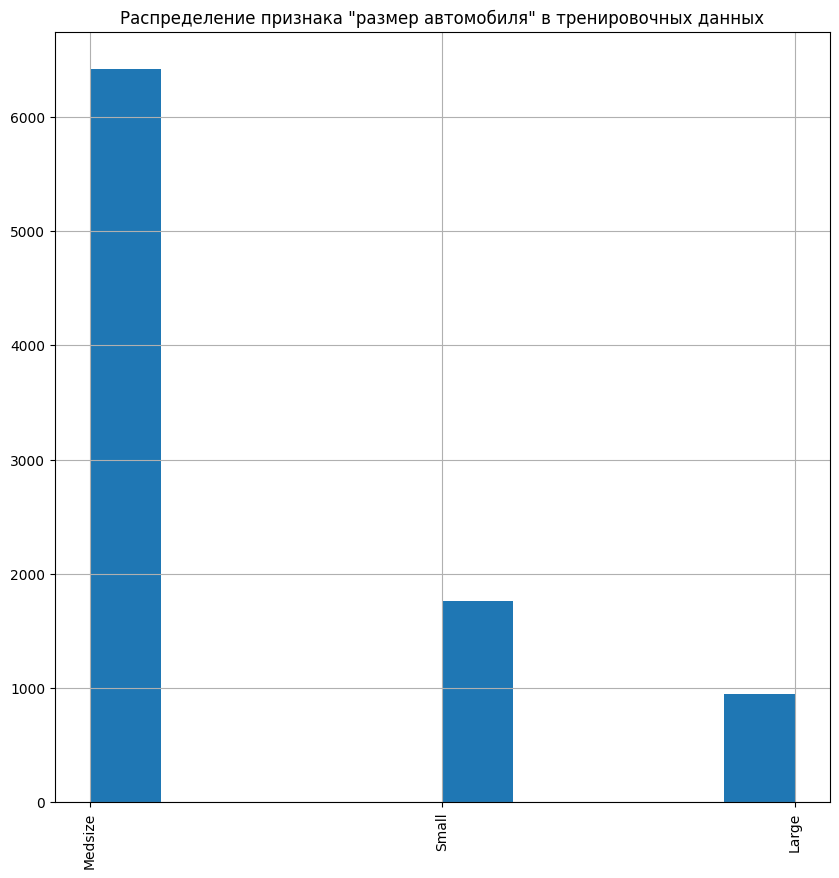

In [126]:
for col in str_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака "{dict_col[col]}" в тренировочных данных')
    plt.xticks(rotation=90)
    train_data[col].hist()

### Предобработка признаков

С помощью LabelEncoder приведем строковые признаки к числовым

In [127]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in str_cols:
    X[col] = le.fit_transform(X[col])

X.sample(10)

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
1511,2680,0,0,2,3,15,4,0,0,1,...,96,0,2,1,5,0,1,820.800000,0,1
6925,8481,0,0,0,0,37,1,0,47048,1,...,37,0,3,1,5,3,2,566.400000,3,1
4528,2230,3,0,1,0,21,1,0,71176,2,...,62,2,1,1,4,1,3,278.072755,5,1
3514,961,3,1,2,3,41,1,0,81872,0,...,55,0,2,0,1,1,3,256.438030,0,1
9094,4530,1,0,0,0,36,4,0,0,1,...,5,0,5,0,2,0,0,356.083230,0,1
243,2657,1,0,1,1,52,1,1,49988,1,...,37,5,5,1,4,1,3,566.935022,5,0
8963,8352,1,0,0,3,33,4,0,0,1,...,84,0,3,1,5,0,0,375.204446,0,1
4999,466,3,0,0,3,43,1,0,77835,0,...,30,1,4,1,5,2,3,43.618784,0,1
1187,8742,3,0,1,1,34,1,1,26030,1,...,29,1,2,0,2,1,2,667.200000,4,1
6428,8097,1,0,0,0,26,1,1,38072,0,...,36,1,3,1,5,0,1,151.055863,3,1


In [128]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   int32  
 1   State                          9134 non-null   int32  
 2   Response                       9134 non-null   int32  
 3   Coverage                       9134 non-null   int32  
 4   Education                      9134 non-null   int32  
 5   Effective To Date              9134 non-null   int32  
 6   EmploymentStatus               9134 non-null   int32  
 7   Gender                         9134 non-null   int32  
 8   Income                         9134 non-null   int64  
 9   Location Code                  9134 non-null   int32  
 10  Marital Status                 9134 non-null   int32  
 11  Monthly Premium Auto           9134 non-null   int64  
 12  Months Since Last Claim        9134 non-null   i

Прорведем стандартизацию данных

In [129]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)

Построим матрицу корреляции

In [134]:
# Преобразуем матрицу признаков в DataFrame
train_data_trasformed = pd.DataFrame(X_sc, columns = X.columns)
train_data_trasformed['Customer Lifetime Value'] = y
# Создаем корреляционную матрицу
corr_m = train_data_trasformed.corr()
corr_m = np.round(corr_m, 2)
corr_m

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Customer Lifetime Value
State,1.00,0.01,0.02,-0.01,0.00,-0.00,0.01,0.02,-0.01,0.02,...,-0.01,-0.01,0.01,-0.02,-0.02,-0.01,-0.01,0.01,-0.00,-0.03
Response,0.01,1.00,-0.00,0.00,0.02,-0.00,0.00,-0.00,0.00,-0.01,...,0.01,-0.00,-0.01,0.01,0.01,-0.01,-0.00,0.01,0.01,0.01
Coverage,0.02,-0.00,1.00,0.00,0.00,-0.04,-0.02,0.00,0.01,0.00,...,0.00,-0.01,-0.02,0.00,-0.00,-0.16,-0.09,0.02,0.02,-0.01
Education,-0.01,0.00,0.00,1.00,0.02,0.01,0.00,-0.01,-0.01,-0.02,...,0.01,-0.01,-0.01,0.00,-0.00,-0.05,-0.02,0.28,-0.02,0.17
Effective To Date,0.00,0.02,0.00,0.02,1.00,0.00,-0.03,0.00,0.02,-0.01,...,0.00,-0.02,0.01,0.01,0.01,0.07,-0.01,0.02,0.01,0.03
EmploymentStatus,-0.00,-0.00,-0.04,0.01,0.00,1.00,-0.00,-0.01,-0.00,-0.00,...,0.01,-0.01,0.01,-0.01,-0.01,-0.00,-0.01,0.00,-0.02,-0.01
Gender,0.01,0.00,-0.02,0.00,-0.03,-0.00,1.00,0.03,-0.73,0.02,...,0.02,0.01,0.01,-0.00,-0.00,-0.12,-0.02,0.33,-0.00,-0.03
Income,0.02,-0.00,0.00,-0.01,0.00,-0.01,0.03,1.00,-0.02,0.00,...,0.00,-0.00,0.02,-0.00,-0.00,0.05,-0.02,0.07,0.02,-0.01
Location Code,-0.01,0.00,0.01,-0.01,0.02,-0.00,-0.73,-0.02,1.00,-0.03,...,-0.00,0.01,-0.01,0.00,0.01,0.14,0.01,-0.36,0.00,0.02
Marital Status,0.02,-0.01,0.00,-0.02,-0.01,-0.00,0.02,0.00,-0.03,1.00,...,0.01,-0.00,0.00,0.02,0.01,-0.02,-0.00,0.25,0.00,0.00


Визуализируем матрицу при помощи sns.heatmap

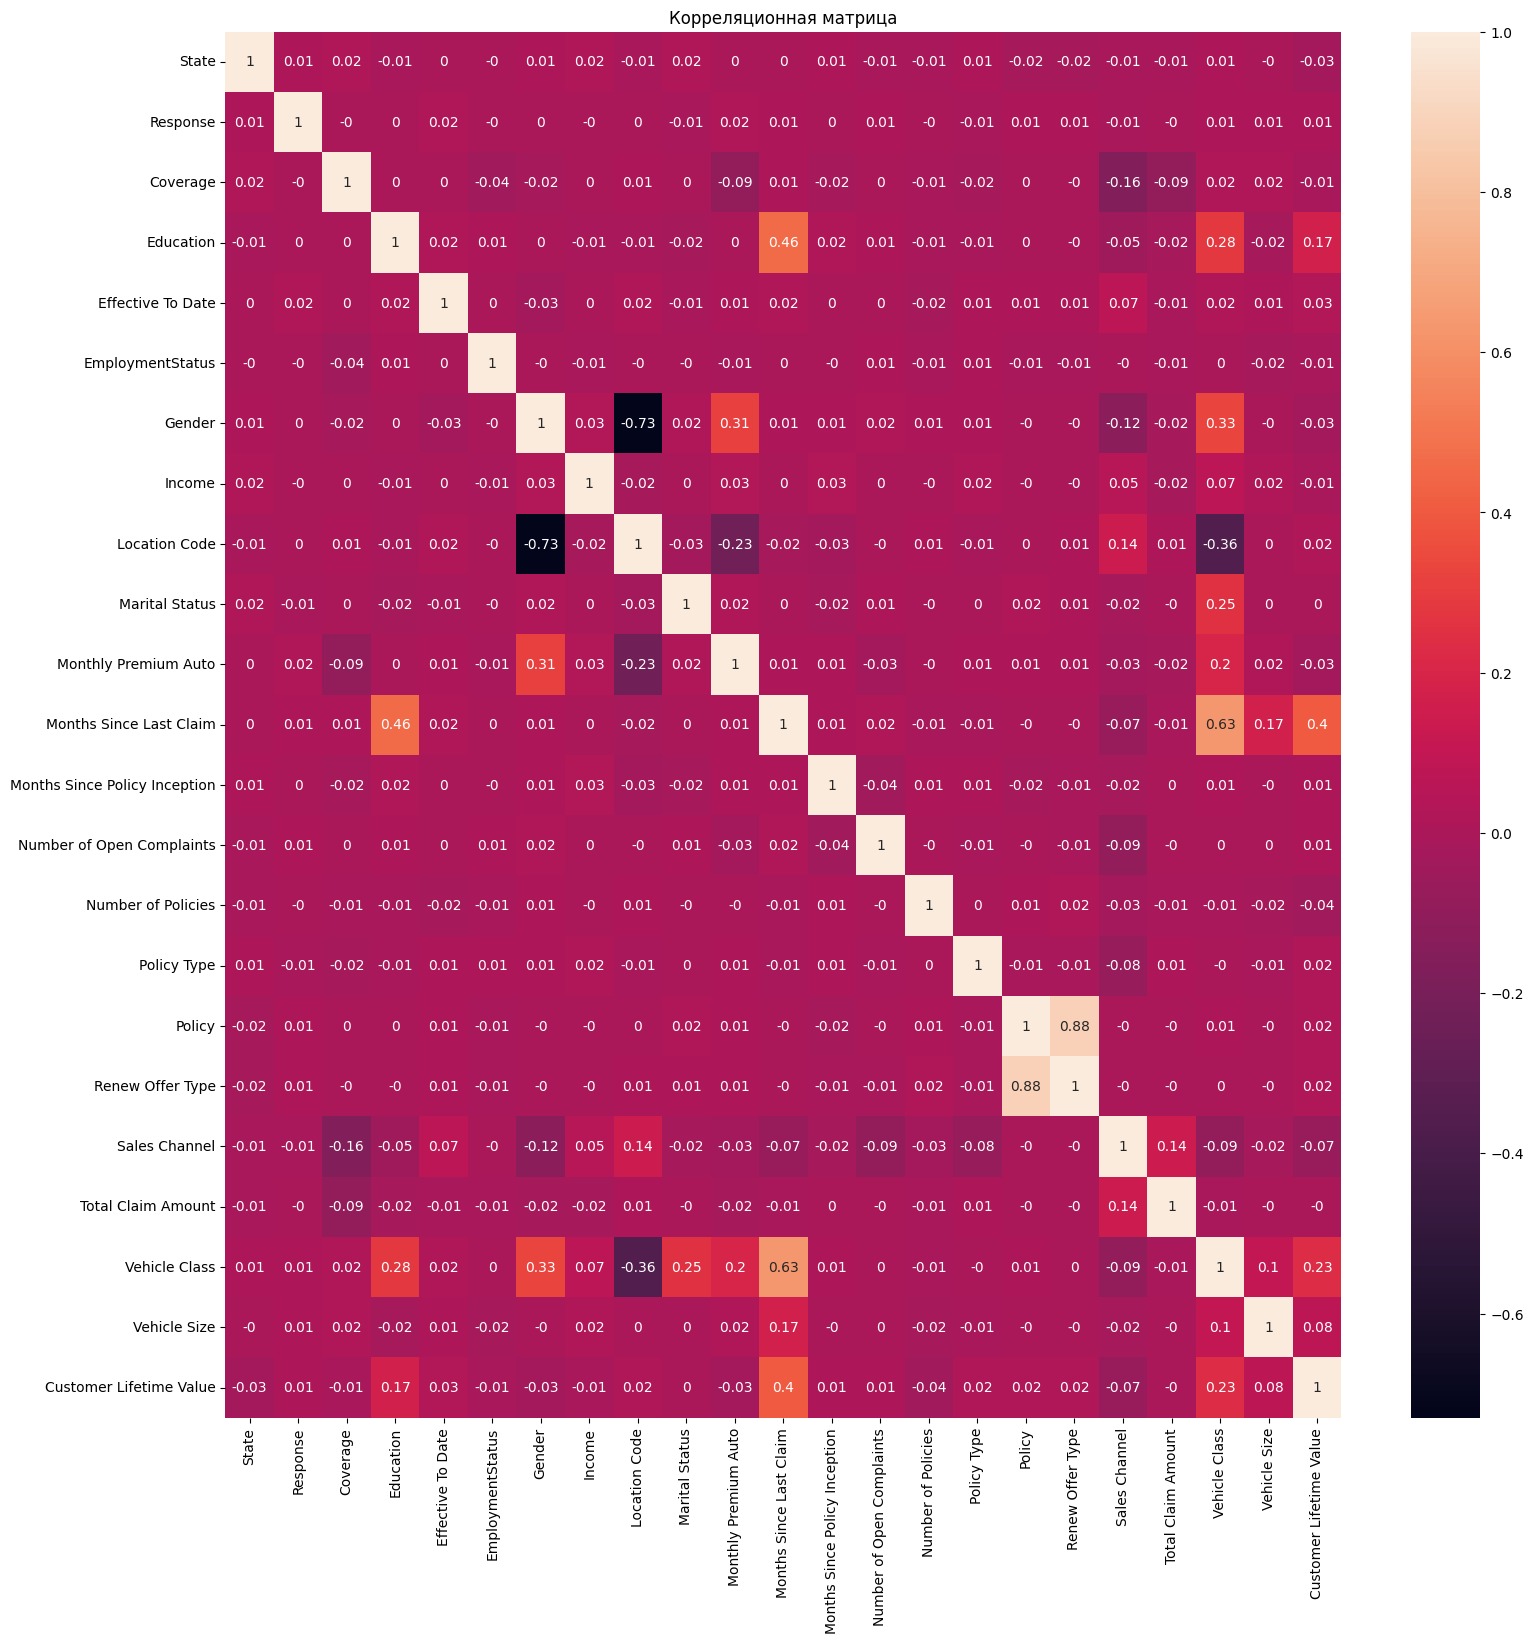

In [135]:
plt.figure(figsize = (18, 18))
plt.title('Корреляционная матрица')
sns.heatmap(corr_m, annot = True)
plt.show()

Вывод: Наиболее зависимы друг от друга признаки "Страховка" и "Тип страховки" (коэффициент корреляции 0,88) и "Ежемесячный Премиум авто" и "Сумма выплаченных компенсаций" (кк = 0,63)

In [132]:
X = X.drop('Customer', axis = 1)

### Обучение моделей

Сравним 3 модели (как в лекции): Логистическую регрессию, классификатор на решающем дереве, и случайный лес

In [136]:
# Логистическая регрессия
from sklearn.linear_model import LogisticRegression

# Кросс-валидация
from sklearn.model_selection import cross_validate

log_reg = LogisticRegression(C = 0.8, random_state = 42, max_iter = 500)

cv_log_reg = cross_validate(log_reg, X_sc, y, cv = 5, scoring = 'roc_auc')
print(cv_log_reg['test_score'])
print("Результаты Логистической регрессии:", sum(cv_log_reg['test_score']) / len(cv_log_reg['test_score']))


[nan nan nan nan nan]
Результаты Логистической регрессии: nan


In [137]:
# Решающее дерево
from sklearn.tree import DecisionTreeClassifier


dec_tree = DecisionTreeClassifier(random_state = 42) # Можно найти более оптимальные гиперпараметры

cv_dec_tree = cross_validate(dec_tree, X_sc, y, cv = 5, scoring = 'roc_auc')

print("Результаты решающего дерева:", sum(cv_dec_tree['test_score']) / len(cv_dec_tree['test_score']))


Результаты решающего дерева: nan


In [138]:
# Случайный лес
from sklearn.ensemble import RandomForestClassifier


ran_for = RandomForestClassifier(random_state = 42) # Можно найти более оптимальные гиперпараметры

cv_ran_for = cross_validate(ran_for, X, y, cv = 5, scoring = 'roc_auc')

print("Результаты решающего дерева:", sum(cv_ran_for['test_score']) / len(cv_ran_for['test_score']))


Результаты решающего дерева: nan


Вывод: 

### Интерпретация модели и важность признаков

In [ ]:
# log_reg.fit(X, y)
# print("Коэффициенты в линейной регрессии:", log_reg.coef_)

In [ ]:
# dec_tree.fit(X, y)
# print("Важность признаков решающего дерева", dec_tree.feature_importances_)

In [ ]:
# import shap
# # Загружаем JS шаблоны для визуализации
# shap.initjs()

# # Обязателен явный вызов метода fit
# ran_for.fit(X, y)

# print("Обучили модель, переходим к визуализации")
# # Интерпретируем предсказания модели при помощи SHAP
# explainer = shap.TreeExplainer(ran_for)
# shap_values = explainer.shap_values(X)

In [ ]:
# # Общий график
# shap.summary_plot(shap_values, X, plot_type="bar")